In [1]:
#pip install requests pandas matplotlib

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
API_KEY = "08eeb6865725fa90acbc036b34b9fe78"
location = "Nashik"

In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?lat=19.99&lon=73.78&appid=08eeb6865725fa90acbc036b34b9fe78"

In [5]:
response = requests.get(url)
data = response.json()

Weather Data: {'Temperature (°C)': 21.260000000000048, 'Humidity (%)': 48, 'Wind Speed (m/s)': 1.83, 'Description': 'clear sky'}

--- Data Analysis ---
       Temperature (°C)  Humidity (%)  Wind Speed (m/s)
count              1.00           1.0              1.00
mean              21.26          48.0              1.83
std                 NaN           NaN               NaN
min               21.26          48.0              1.83
25%               21.26          48.0              1.83
50%               21.26          48.0              1.83
75%               21.26          48.0              1.83
max               21.26          48.0              1.83


<Figure size 800x500 with 0 Axes>

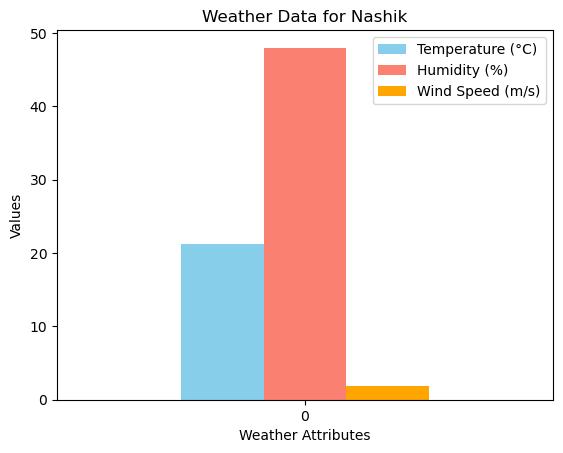

In [6]:
if response.status_code == 200:
    weather_data = {
        'Temperature (°C)': data['main']['temp']- 273.15,
        'Humidity (%)': data['main']['humidity'],
        'Wind Speed (m/s)': data['wind']['speed'],
        'Description': data['weather'][0]['description']
    }
    
    print("Weather Data:", weather_data)

    df = pd.DataFrame([weather_data])

    print("\n--- Data Analysis ---")
    print(df.describe())

    plt.figure(figsize=(8, 5))
    df[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)']].plot(kind='bar', color=['skyblue', 'salmon', 'orange'])
    plt.title(f"Weather Data for {location}")
    plt.ylabel("Values")
    plt.xlabel("Weather Attributes")
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
else:
    print(f"Error fetching data: {response.status_code}")